In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("data/boston.csv",header=0)
#print(df.describe())

df = df.values
df = np.array(df)
for i in range(12):
    df[:,i] = (df[:,i] - df[:,i].min())/(df[:,i].max()-df[:,i].min())
x_data = df[:,:12]
y_data = df[:,12]
#print(x_data,"\n shape = ",x_data.shape)
#print(y_data,"\n shape = ",y_data.shape)

#tf.disable_eager_execution()
x = tf.placeholder(tf.float32,[None,12],name="X")
y = tf.placeholder(tf.float32,[None,1],name="Y")

with tf.name_scope("Model"):
    w = tf.Variable(tf.random_normal([12,1],stddev=0.01),name="w")
    b = tf.Variable(1.0,name="b")
    
    def model(x,w,b):
        return tf.matmul(x,w)+b
    
    pred = model(x,w,b)
    
train_epoch = 50
learn_rate = 0.01

with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred,2))    
optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss_function)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_list = []

for epoch in range(train_epoch):
    loss_sum = 0.0
    for xs,ys in zip(x_data,y_data):
        xs = xs.reshape(1,12)
        ys = ys.reshape(1,1)
        
        _,loss = sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        loss_sum = loss_sum + loss
        
    xvalues,yvalues = shuffle(x_data,y_data)
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    loss_avg = loss_sum/len(y_data)
    loss_list.append(loss_avg)
    
    print("epoch = ",epoch+1,"loss = ",loss_avg,"w = ",w0temp,"b = ",b0temp)

epoch =  1 loss =  60.706735005243104 w =  [[-0.8387198 ]
 [ 2.9207337 ]
 [ 0.01383761]
 [ 0.77757275]
 [ 1.4469703 ]
 [ 9.698418  ]
 [ 2.8784077 ]
 [ 3.0893009 ]
 [ 0.5869971 ]
 [ 0.21102944]
 [ 1.2618269 ]
 [-3.8864872 ]] b =  10.969766
epoch =  2 loss =  37.06549004773802 w =  [[-1.5496769 ]
 [ 3.5122762 ]
 [-0.5335032 ]
 [ 1.4401382 ]
 [ 1.642498  ]
 [13.798343  ]
 [ 2.1979375 ]
 [ 2.560951  ]
 [ 0.8745178 ]
 [-0.4069347 ]
 [-0.61019063]
 [-8.010458  ]] b =  12.918548
epoch =  3 loss =  30.58791639989858 w =  [[ -2.1669374 ]
 [  3.428711  ]
 [ -0.7318249 ]
 [  1.8443347 ]
 [  1.8037235 ]
 [ 16.574945  ]
 [  1.8184484 ]
 [  1.6744175 ]
 [  1.308791  ]
 [ -0.83179504]
 [ -1.8933969 ]
 [-11.081782  ]] b =  14.164358
epoch =  4 loss =  27.307176606926134 w =  [[ -2.720671  ]
 [  3.14003   ]
 [ -0.7864183 ]
 [  2.033073  ]
 [  1.8477584 ]
 [ 18.527534  ]
 [  1.5510774 ]
 [  0.74557775]
 [  1.761877  ]
 [ -1.157445  ]
 [ -2.777284  ]
 [-13.414656  ]] b =  15.069917
epoch =  5 loss =  25.

epoch =  35 loss =  21.28827575220973 w =  [[-10.683677  ]
 [  2.6581373 ]
 [  0.40274635]
 [  1.3361082 ]
 [ -4.3490553 ]
 [ 21.22394   ]
 [  0.05587529]
 [ -9.933985  ]
 [  5.311187  ]
 [ -4.556907  ]
 [ -5.681989  ]
 [-21.106531  ]] b =  23.864576
epoch =  36 loss =  21.26905658673461 w =  [[-10.799508  ]
 [  2.6880035 ]
 [  0.4101558 ]
 [  1.3352075 ]
 [ -4.4529347 ]
 [ 21.15532   ]
 [  0.04660723]
 [-10.068881  ]
 [  5.338276  ]
 [ -4.597247  ]
 [ -5.704277  ]
 [-21.108232  ]] b =  23.994549
epoch =  37 loss =  21.251220598793317 w =  [[-10.910421  ]
 [  2.7165718 ]
 [  0.41668057]
 [  1.3344234 ]
 [ -4.5522046 ]
 [ 21.08894   ]
 [  0.03768905]
 [-10.198228  ]
 [  5.3641157 ]
 [ -4.6355543 ]
 [ -5.7256565 ]
 [-21.11006   ]] b =  24.119566
epoch =  38 loss =  21.23467142488402 w =  [[-11.016622  ]
 [  2.743896  ]
 [  0.4223987 ]
 [  1.3337411 ]
 [ -4.647093  ]
 [ 21.024748  ]
 [  0.02910538]
 [-10.322272  ]
 [  5.38877   ]
 [ -4.6719418 ]
 [ -5.746175  ]
 [-21.112017  ]] b =  24.23

In [32]:
n = np.random.randint(506)
print(n)
x_test = x_data[n]
x_test = x_test.reshape(1,12)
predict =  sess.run(pred,feed_dict = {x:x_test})
print("预测值：%f" % predict)
print("标签值：%f" % y_data[n] )

25
预测值：13.767086
标签值：13.900000


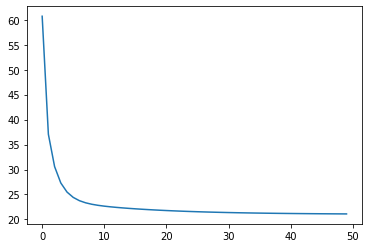

In [30]:
plt.plot(loss_list)